# Statistical Analysis on League Ranked Games

### Importing libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Setting path to data

In [26]:
path_to_data = "C:/Users/Matheus/Desktop/Github/LEAGUE_RANKED_ANALYSIS/preprocessed_data.csv"

### Retrieving data

In [27]:
df = pd.read_csv(path_to_data, index_col=0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9879 entries, 4519157822 to 4523772935
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   matchWinner          9879 non-null   int64  
 1   matchFirstBlood      9879 non-null   int64  
 2   blueKills            9879 non-null   int64  
 3   redKills             9879 non-null   int64  
 4   blueAssists          9879 non-null   int64  
 5   redAssists           9879 non-null   int64  
 6   blueWardsPlaced      9879 non-null   int64  
 7   blueWardsDestroyed   9879 non-null   int64  
 8   redWardsPlaced       9879 non-null   int64  
 9   redWardsDestroyed    9879 non-null   int64  
 10  blueEliteMonsters    9879 non-null   int64  
 11  blueTowersDestroyed  9879 non-null   int64  
 12  redEliteMonsters     9879 non-null   int64  
 13  redTowersDestroyed   9879 non-null   int64  
 14  blueDragons          9879 non-null   int64  
 15  blueHeralds          98

### Looking through basic statistics on each feature

In [63]:
pd.set_option("display.max_rows", 10, "display.max_columns", None)
df.describe()

,matchWinner,matchFirstBlood,blueKills,redKills,blueAssists,redAssists,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed,blueEliteMonsters,blueTowersDestroyed,redEliteMonsters,redTowersDestroyed,blueDragons,blueHeralds,redDragons,redHeralds,blueTotalGold,blueTotalExperience,redTotalGold,redTotalExperience,blueCSPerMin,redCSPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,0.504808,6.183925,6.137666,6.645106,6.662112,22.288288,2.824881,22.367952,2.723150,0.549954,0.051422,0.573135,0.043021,0.361980,0.187974,0.413098,0.160036,16503.455512,17928.110133,16489.041401,17961.730438,21.669956,21.734923
std,0.500024,0.500002,3.011028,2.933818,4.064520,4.060612,18.019177,2.174998,18.457427,2.138356,0.625527,0.244369,0.626482,0.216900,0.480597,0.390712,0.492415,0.366658,1535.446636,1200.523764,1490.888406,1198.583912,2.185844,2.191167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,10098.000000,11212.000000,10465.000000,9.000000,10.700000
25%,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000,14.000000,1.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,17168.000000,15427.500000,17209.500000,20.200000,20.300000
50%,0.000000,1.000000,6.000000,6.000000,6.000000,6.000000,16.000000,3.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,17951.000000,16378.000000,17974.000000,21.800000,21.800000
75%,1.000000,1.000000,8.000000,8.000000,9.000000,9.000000,20.000000,4.000000,20.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,17459.000000,18724.000000,17418.500000,18764.500000,23.200000,23.300000
max,1.000000,1.000000,22.000000,22.000000,29.000000,28.000000,250.000000,27.000000,276.000000,24.000000,2.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,23701.000000,22224.000000,22732.000000,22269.000000,28.300000,28.900000


### Correlation matrix between sets of variables

I'll be separating the Pearson Correlation Matrix with some sets of variables to understand better each feature on their importance to achieve a Win on a match. It's importante to notice that as we are using a Match Winner with 0s and 1s, the importance for red side is more correlated on -1, and for the blue side, more correlated on 1.

#### Auxiliar Functions

In [191]:
def plot_correlation_matrix(df, var_set, corr_method, plot_name, size=(8,6)):
    corr_matrix = df[var_set].corr(method=corr_method).round(2)
    plt.figure(figsize=size)
    sn.heatmap(corr_matrix, annot=True, cmap="RdBu", vmin=-1, vmax=1)
    plt.title("Correlation Matrix for {}".format(plot_name), fontsize=18)
    plt.show()

#### Correlation between Wins, Kills and Assists

In [192]:
s1 = ["matchWinner", 
      "blueKills", "blueAssists", 
      "redKills", "redAssists"]

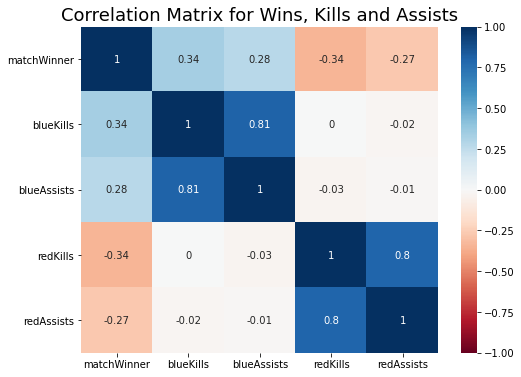

In [193]:
plot_correlation_matrix(df, s1, "pearson", "Wins, Kills and Assists")

#### Correlation between Wins and Objectives

In [194]:
s2 = ["matchWinner", 
      "blueEliteMonsters", "blueTowersDestroyed", "blueDragons", "blueHeralds", 
      "redEliteMonsters", "redTowersDestroyed", "redDragons", "redHeralds"]

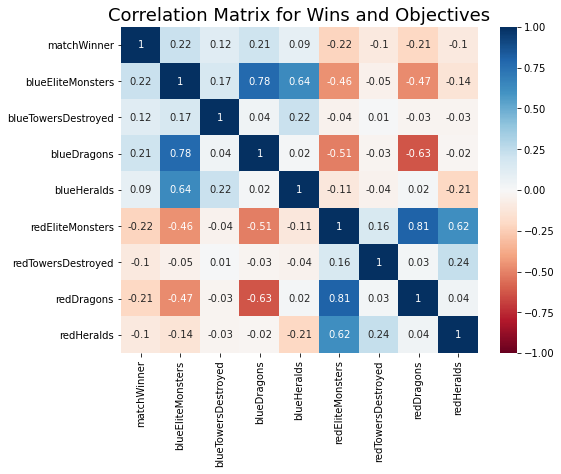

In [195]:
plot_correlation_matrix(df, s2, "pearson", "Wins and Objectives")

#### Correlation between Wins and Ward Control

In [196]:
s3 = ["matchWinner",
      "blueWardsPlaced", "blueWardsDestroyed",
      "redWardsPlaced", "redWardsDestroyed"]

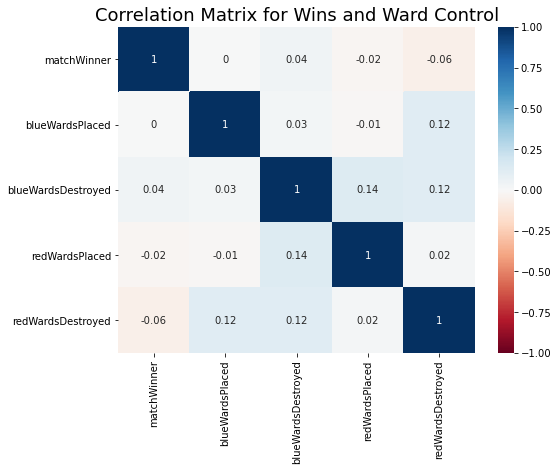

In [197]:
plot_correlation_matrix(df, s3, "pearson", "Wins and Ward Control")

#### Correlation between Ward Control and Objectives

In [198]:
s4 = ["blueWardsPlaced", "blueWardsDestroyed",
      "blueDragons", "blueHeralds", 
      "redWardsPlaced", "redWardsDestroyed",
      "redDragons", "redHeralds"]

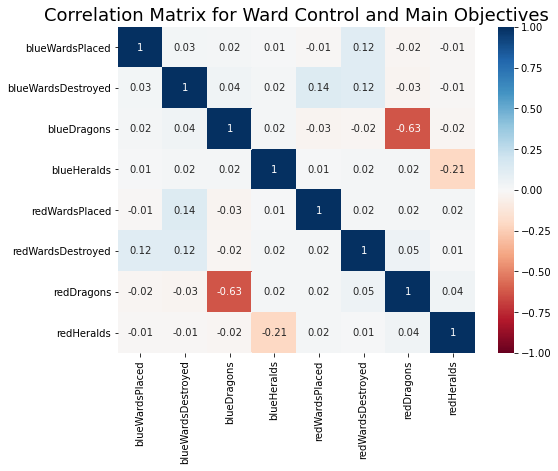

In [199]:
plot_correlation_matrix(df, s4, "pearson", "Ward Control and Main Objectives")

#### Correlation between Wins and Lane Advantages

In [200]:
s5 = ["matchWinner",
      "blueTotalGold", "blueTotalExperience", "blueCSPerMin",
      "redTotalGold", "redTotalExperience", "redCSPerMin"]

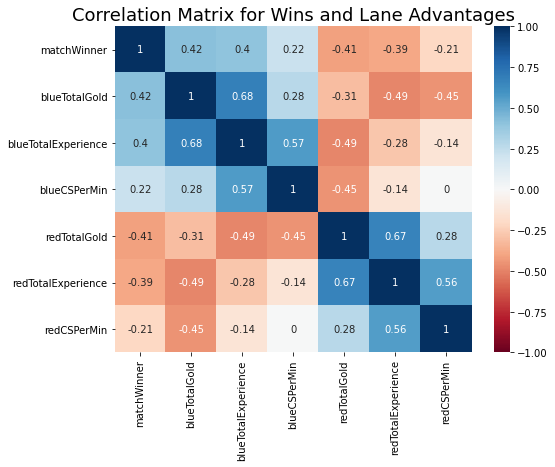

In [201]:
plot_correlation_matrix(df, s5, "pearson", "Wins and Lane Advantages")

#### Correlation between Wins, First Bloods and Kills

In [202]:
s6 = ["matchWinner", "matchFirstBlood",
      "blueKills", "blueAssists",
      "redKills", "redAssists"]

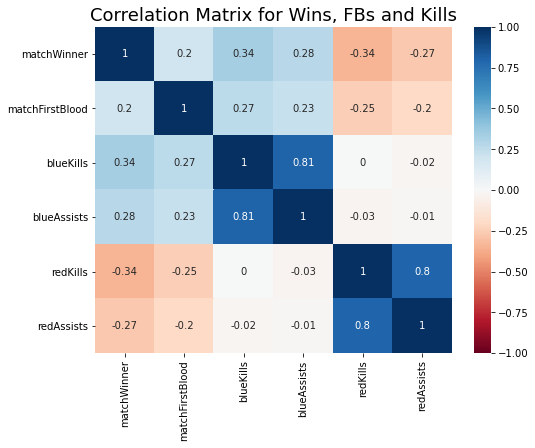

In [203]:
plot_correlation_matrix(df, s6, "pearson", "Wins, FBs and Kills")

#### Full Pearson Correlation

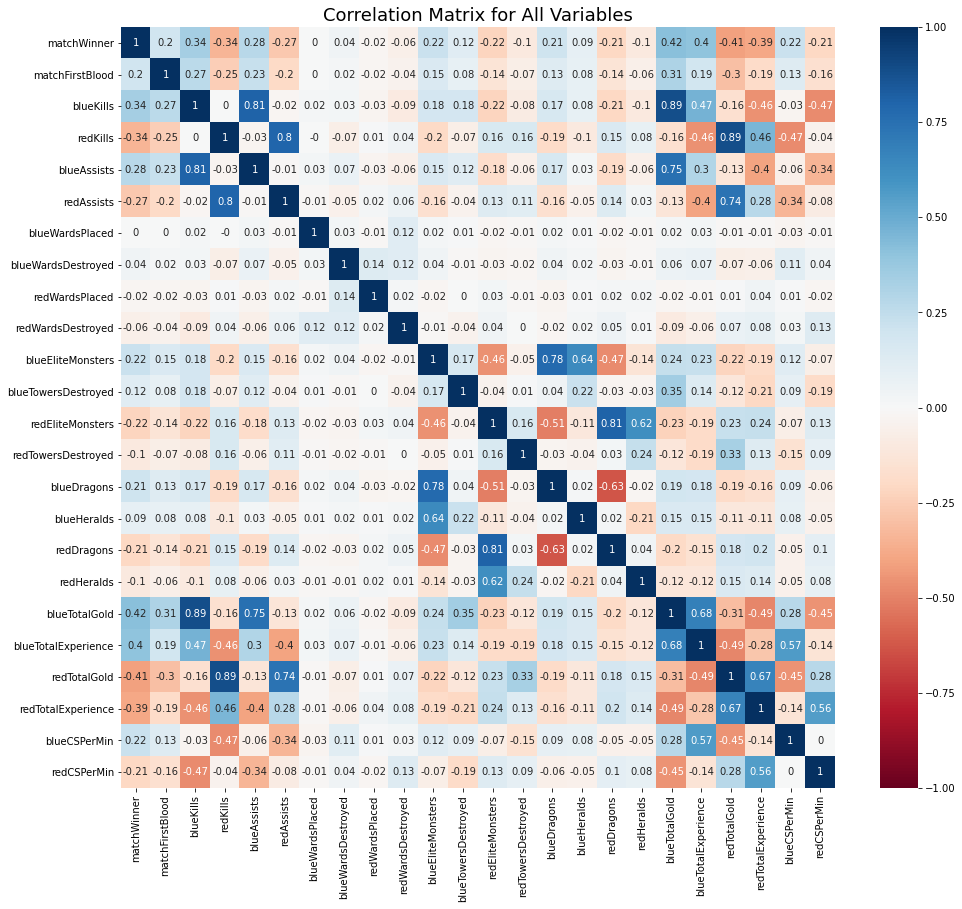

In [204]:
plot_correlation_matrix(df, list(df.columns), "pearson", "All Variables", size=(16, 14))